In [1]:
import numpy as np
import json
import os
import matplotlib.pyplot as plt
import torch
from scipy.special import softmax

In [2]:
dir = r'G:\EFS-GX6\4130_Arbeitsgruppen\4137_KHO_Performance\Studentische_Themen\RaviKothari\Dataset\CARRADA_old\Carrada\raw_radar\2019-09-16-12-52-12'
raw = '000183'
grd_truth = np.load('000183.npy')


In [7]:
box = json.load(open(os.path.join(dir,'annotations','box','range_angle_light.json')))
box_cor = box['000183']['boxes']

In [12]:
box['000183']['boxes']

[[112, 124, 121, 127]]

In [6]:
print(os.path.join(dir,'annotations','box','range_angle_light.json'))

G:\EFS-GX6\4130_Arbeitsgruppen\4137_KHO_Performance\Studentische_Themen\RaviKothari\Dataset\CARRADA_old\Carrada\raw_radar\2019-09-16-12-52-12\annotations\box\range_angle_light.json


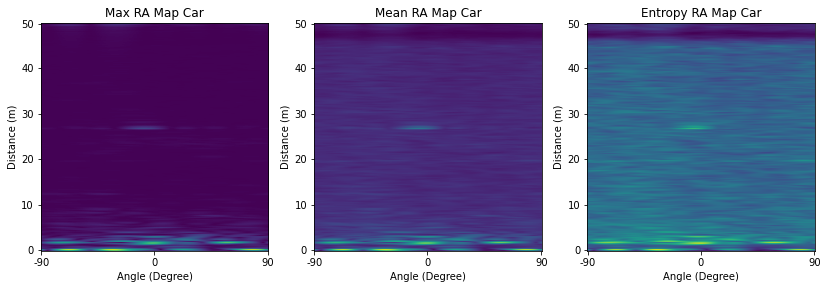

In [95]:
# grd_truth = np.load(os.path.join(dir,'range_angle_numpy',raw+str(".npy")))
fig,ax = plt.subplots(1,3,figsize = (10,10))
# plt.tight_layout(rect=[0, 0.03, 0.8, 0.8])
ax[0].imshow(np.amax(grd_truth,axis=2))
ax[1].imshow(np.mean(grd_truth,axis=2))
ax[2].imshow(grd_entropy)
ax[0].title.set_text("Max RA Map Car")
ax[1].title.set_text("Mean RA Map Car")
ax[2].title.set_text("Entropy RA Map Car")
grd_size = grd_truth.shape
ax[0].set_xticks([0, int(grd_size[1]/2)-1, grd_size[1]-1])
ax[0].set_yticks([0,grd_size[1]*1/5-1,grd_size[1]*2/5-1,grd_size[1]*3/5-1, grd_size[1]*4/5-1,grd_size[1]-1])

ax[0].set_yticklabels([50, 40, 30, 20, 10, 0])
ax[0].set_xticklabels([-90, 0, 90])
ax[0].set_ylabel('Distance (m)')
ax[0].set_xlabel('Angle (Degree)')

ax[1].set_xticks([0, int(grd_size[1]/2)-1, grd_size[1]-1])
ax[2].set_xticks([0, int(grd_size[1]/2)-1, grd_size[1]-1])
ax[1].set_yticks([0,grd_size[1]*1/5-1,grd_size[1]*2/5-1,grd_size[1]*3/5-1, grd_size[1]*4/5-1,grd_size[1]-1])
ax[2].set_yticks([0,grd_size[1]*1/5-1,grd_size[1]*2/5-1,grd_size[1]*3/5-1, grd_size[1]*4/5-1,grd_size[1]-1])
ax[1].set_yticklabels([50, 40, 30, 20, 10, 0])
ax[1].set_xticklabels([-90, 0, 90])
ax[1].set_ylabel('Distance (m)')
ax[1].set_xlabel('Angle (Degree)')

ax[2].set_yticklabels([50, 40, 30, 20, 10, 0])
ax[2].set_xticklabels([-90, 0, 90])
ax[2].set_ylabel('Distance (m)')
ax[2].set_xlabel('Angle (Degree)')
plt.subplots_adjust(right = 1.2)

In [3]:
kernel = []

for chn in range (grd_truth.shape[2]):
    entropy = softmax(grd_truth[:,:,chn]/np.mean(grd_truth[:,:,chn]))
    entropy = -entropy*np.log2(entropy)
    kernel = np.append(kernel,np.sum(entropy))


Text(0, 0.5, 'Weight')

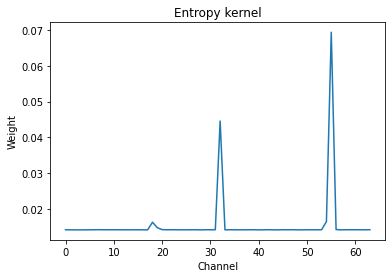

In [91]:

#kernel = kernel/np.sum(kernel)
plt.plot(kernel)
plt.title('Entropy kernel')
plt.xlabel('Channel')
plt.ylabel('Weight')

In [4]:
grd_entropy = np.zeros(grd_truth.shape[0:2])
for idx in range(grd_truth.shape[2]):
    grd_entropy += grd_truth[:,:,idx]*kernel[idx]


In [5]:
max_map = np.amax(grd_truth,axis=2)
mean_map = np.mean(grd_truth,axis=2)


In [10]:
x1,y1,x2,y2 = box_cor[0]
margin = 70
mat = grd_entropy
signal = np.mean(mat[(y1-10):(y2+10),(x1-10):(x2+10)])
noise = np.mean(mat[(y1-margin):(y2+margin),(x1-margin):(x2+margin)])
print(np.log10(signal/noise), signal, noise)

0.026348482299868935 55121.889750593604 51877.09108706915
